# 3번
설문조사 데이터      
데이터 출처 : 자체 제작    
데이터 경로 : /kaggle/input/adp-kr-p3/problem3.csv 

데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다. 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)    
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다. 각 영역의 3번문항의 1번문항의 역문제이다. 
모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다

### 3-1 역문항을 변환 한 후 각 그룹`(A~D)`의 영역`(Q1~Q5)`별 응답의 평균, 표준편차, 왜도, 첨도를 구하라. (각 통계량 별로 4x5 dataframe 생성)

In [9]:
import pandas as pd

df = pd.read_csv('problem3.csv')
for q_n in range(1, 6):
    df[f'Q{q_n}-3'] = 6 - df[f'Q{q_n}-3']
df

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,5,2,4,5,3,3,...,5,1,5,2,1,3,3,4,3,4
1,1,A,2,2,3,3,4,3,5,4,...,4,3,4,3,1,3,1,2,5,1
2,2,A,1,3,2,4,2,1,2,4,...,2,2,1,3,2,1,3,3,4,5
3,3,A,3,3,2,2,2,4,2,3,...,4,3,3,4,4,4,1,1,3,2
4,4,A,3,1,4,3,4,3,2,1,...,1,1,3,2,3,1,3,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,D,1,5,4,5,5,4,5,1,...,4,2,4,5,3,3,3,5,5,5
996,996,D,4,1,3,5,4,5,2,5,...,4,4,1,3,4,1,3,1,5,4
997,997,D,2,4,2,4,1,2,4,3,...,4,2,3,1,4,1,2,4,2,1
998,998,D,4,4,4,3,2,3,2,3,...,3,2,5,3,3,5,4,4,5,4


In [3]:
def make_pivot_table(df:pd.DataFrame) -> pd.DataFrame:
    len_Q = 5
    len_P = 4
    group = []
    for _ in range(len_P):
        group.extend(list(df.group))
        
    merge_df = pd.DataFrame({'group':group})
    for num in range(1,len_Q+1):
        merge_df[f'Q{num}'] = sum([list(df[f'Q{num}-{col}'].values) for col in range(1, len_P+1)], [])


    agg_function = ['mean', 'std', 'skew', pd.DataFrame.kurt]
    grouped = merge_df.pivot_table(
        index = 'group',
        values = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
        aggfunc = {f'Q{n}':agg_function for n in range(1, len_Q+1)}
    )
    
    return grouped

make_pivot_table(df)

Q1                                   Q2                   \
           kurt   mean      skew       std      kurt   mean      skew   
group                                                                   
A     -1.087887  3.016 -0.077803  1.263860 -0.997133  3.058 -0.129390   
B     -1.022905  3.042 -0.126751  1.242489 -1.060834  3.048 -0.111043   
C     -1.033246  3.030 -0.050626  1.243642 -1.046603  3.063 -0.122030   
D     -1.081406  2.991 -0.069421  1.264325 -1.018150  3.091 -0.166334   

                       Q3                                   Q4         \
            std      kurt   mean      skew       std      kurt   mean   
group                                                                   
A      1.236999 -1.098330  2.992 -0.061600  1.268679 -1.028166  3.043   
B      1.266215 -1.035672  3.050 -0.117158  1.238965 -1.014676  3.041   
C      1.256427 -0.988577  3.023 -0.102330  1.248210 -1.100094  3.014   
D      1.249913 -1.043094  3.034 -0.128043  1.255556 -1.006126  3.080   

                                 Q5                             
           skew       std      kurt   mean      skew       std  
group                                                           
A     -0.090314  1.255678 -1.053632  3.088 -0.102638  1.256119  
B     -0.071541  1.240507 -1.080934  2.983 -0.055805  1.272136  
C     -0.074531  1.283531 -1.071557  2.987 -0.068696  1.260325  
D     -0.144620  1.268546 -1.055332  2.989 -0.065315  1.250777

### 3-2 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라

<AxesSubplot:xlabel='group', ylabel='Q1-1'>

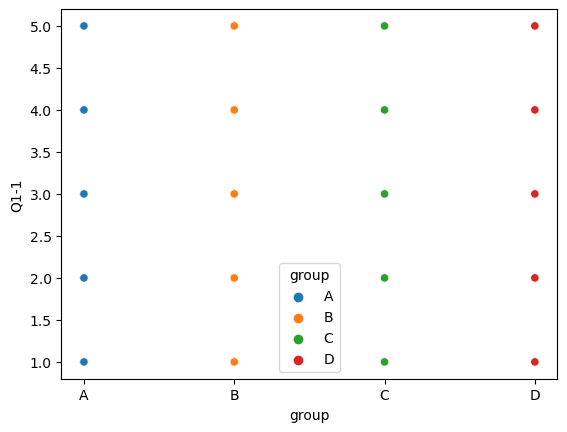

In [15]:
import seaborn as sns

sns.scatterplot(data=df, x='group', y='Q1-1', hue='group')

In [14]:
import scipy.stats as stats

def ANOVA_Normality_Test(df, standard, target):
    '''
        H0 : standard column에서 target 데이터에 대한 평균은 모두 같다.
        H1 : 적어도 하나의 standard column의 그룹에서 평균값에 차이가 존재한다.
    '''
    target_data = [df[df[standard] == g][target] for g in df[standard].unique()]
    
    significance_level = []
    for i, group in enumerate(target_data):
        result = stats.shapiro(group)
        significance_level.append(False if result[1] < 0.05 else True)
        print(f'{i+1} ShapiroResult p-value', round(result[1], 3))

    print('accept the null hypothesis' if any(significance_level) else 'reject the null hypothesis')

ANOVA_Normality_Test(df, standard='group', target='Q1-1')

1 ShapiroResult p-value 0.0
2 ShapiroResult p-value 0.0
3 ShapiroResult p-value 0.0
4 ShapiroResult p-value 0.0
reject the null hypothesis


In [11]:
def Kruskal_Test(df, standard, target):
    target_data = [df[df[standard] == g][target] for g in df[standard].unique()]
    print(stats.kruskal(*target_data))

Kruskal_Test(df, standard='group', target='Q1-1')

KruskalResult(statistic=4.567127187870985, pvalue=0.20638028098088249)


### 3-3 탐색적 요인분석을 수행하고 결과를 시각화 하라

## 탐색적 요인 분석
- 요인 분석(FA)은 관찰된 변수 집합에서 영향력있는 기본 요인 또는 잠재 변수들을 검색하는 데 사용되는 탐색적 데이터 분석 방법이다.
- 변수 수를 줄여서 데이터 해석에 도움을 준다.
- 모든 변수에서 최대 공분산을 추출하여 공통 점수에 넣는다.
- 요인 분석은 시장 조사, 광고, 심리학, 금융 및 운영 연구에 널리 사용됨
- 예를 들어, 시장 조사원은 요인 분석을 사용하여 가격에 민감한 고객을 식별하고 소비자 선택에 영향을 미치는 브랜드 기능을 식별하며 유통 채널에 대한 채널 선택 기준을 이해하는 데 도움을 준다.

## 탐색적 요인 분석의 전제조건
- 등간척도, 정규분포, 관찰치가 상호독립적이며 분산이 동일해야 한다.
- 모상관 행렬이 단위 행렬이라는 가설이 기각되어야 함(KMO / Bartleet의 검정)
- 최초 요인 추출 단계에서 얻은 고유치를 scree chart로 표현했을 때, 한군데 이상 꺾이는 곳이 있어야 함
- 변수간에 높은 상관관계가 있어야 한다.(상관관계가 높은 변수들끼리 그룹화하는 것이기 때문)

## 탐색적 요인 분석 방법
- 변수간의 상관행렬로부터 공통요인을 도출한다.
- 도출된 공통요인을 이용해서 변수간의 상관관계를 설명한다.
- 요인부하량은 플러스 마이너스 0.3 이상이면 유의하다고 본다.

## 탐색적 요인 분석의 목적
1. 자료의 요약 : 변수들을 몇개의 공통된 변인으로 묶는다.
2. 출정도구 타당성 검정 : 변인들이 동일한 요인으로 묶이는지를 확인
3. 변인구조 파악 : 변수들의 상호관계를 파악
4. 불필요한 변인 제거 : 중요도나 설명력이 낮은 변수를 제거한다.
5. 회귀분석이나 판별분석의 설명변수 선택

## PCA와의 차이점
- PCA 성분은 최대 분산량을 설명하는 반면 요인 분석은 데이터의 공분산을 설명
- PCA 구성 요소는 서로 완전히 직교하는 반면 요인 분석에서는 요인이 꼭 직교하는 것은 아니다.
- PCA 성분은 관찰된 변수의 선형 조합이지만, FA에서 관찰된 변수는 관찰되지 않은 변수 또는 요인의 선형 조합이다.
- PCA 구성 요소는 해석할 수 없지만, FA에서 기본 요소는 라벨링 및 해석할 수 있따.
- PCA는 일종의 차원 감소 방법이며 요인 분석은 잠재 변수 방법이다.
- PCA는 관찰이지만 FA는 모델링 기술입니다.

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

df_f =  df.drop(['userid', 'group'], axis=1)
chi_square_value, p_value=calculate_bartlett_sphericity(df_f)

print(p_value)
print('accept the null hypothesis' if p_value < 0.05 else 'reject the null hypothesis')

0.12271947500306984
reject the null hypothesis


In [12]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_f)
print('accept the null hypothesis' if kmo_model >= 0.6 else 'reject the null hypothesis')

reject the null hypothesis


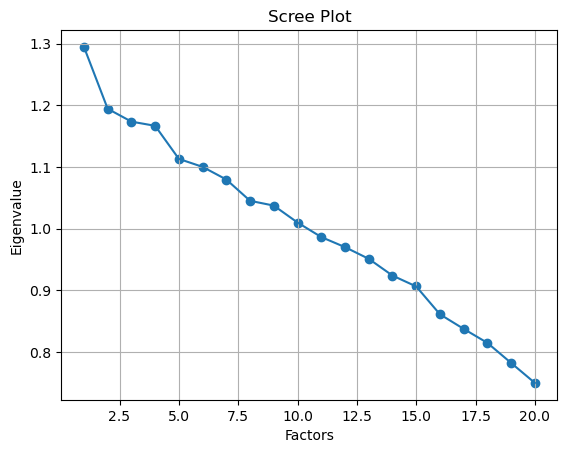

In [13]:
import matplotlib.pyplot as plt

fa = FactorAnalyzer(n_factors=25,rotation=None)
fa.fit(df_f)
#Eigen값 체크 
ev, v = fa.get_eigenvalues()
plt.scatter(range(1,df_f.shape[1]+1),ev)
plt.plot(range(1,df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<AxesSubplot:>

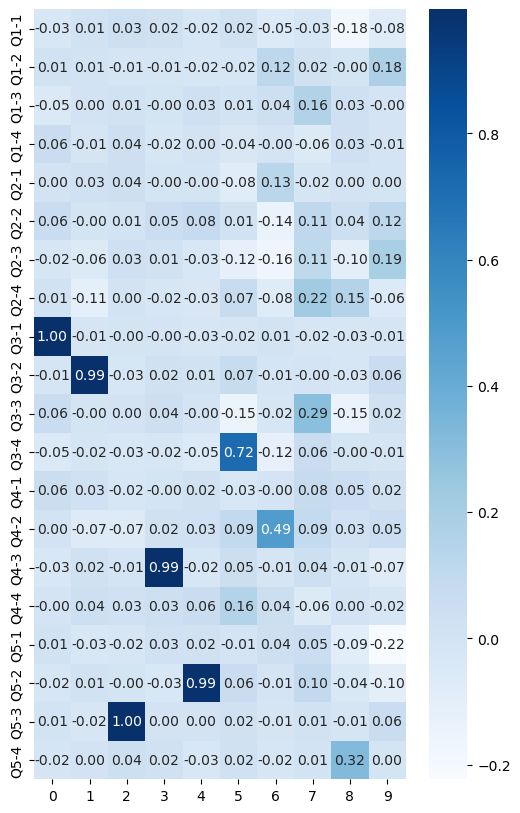

In [16]:
fa = FactorAnalyzer(n_factors=10, rotation="varimax") #ml : 최대우도 방법
fa.fit(df_f)
efa_result= pd.DataFrame(fa.loadings_, index=df_f.columns)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')